## Imports

Import the required modules:

In [1]:
from sys import path
path.insert(0, '..')

from src.LecturaSenalesSimuladas import *
from src.Modelo import *
from src.Training import *
from src.Testing import *

## Data

Create a custom Dataset with the simulated signals from the Data directory:

In [2]:
dataset = ApneaDataset('..\Data\ApneaDetection_SimulatedSignals\SenalesCONapnea.csv', '..\Data\ApneaDetection_SimulatedSignals\SenalesSINapnea.csv')

In [3]:
print('Signal count: ', dataset.__len__())
input_size = dataset.signal_len()
print('Signal length: ', input_size)

Signal count:  4000
Signal length:  1000


Split the Dataset into train, validation and test Subsets:

In [4]:
dataset.split_dataset(train_perc = 0.6, 
                      val_perc = 0.2, 
                      test_perc = 0.2)

In [5]:
print(dataset.trainset.__len__())
print(dataset.valset.__len__())
print(dataset.testset.__len__())

2400
800
800


In [6]:
analisis_datos = dataset.analisis_datos()
print(analisis_datos)


Training data count: 2400
	With apnea: 1200
	Without apnea: 1200
Validation data count: 800
	With apnea: 410
	Without apnea: 390
Test data count: 800
	With apnea: 395
	Without apnea: 405



## Model

Load existing example model 'modelo_prueba':

In [7]:
nombre = 'modelo_prueba'
model = Model.load_model(nombre, input_size, extension = '.pth')

In [8]:
print(model.get_architecture())



Model(
  (conv_layers): Sequential(
    (0): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (6): ReLU()
    (7): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (8): ReLU()
    (9): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (11): ReLU()
    (12): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (13): ReLU()
    (14): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=32000, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU(

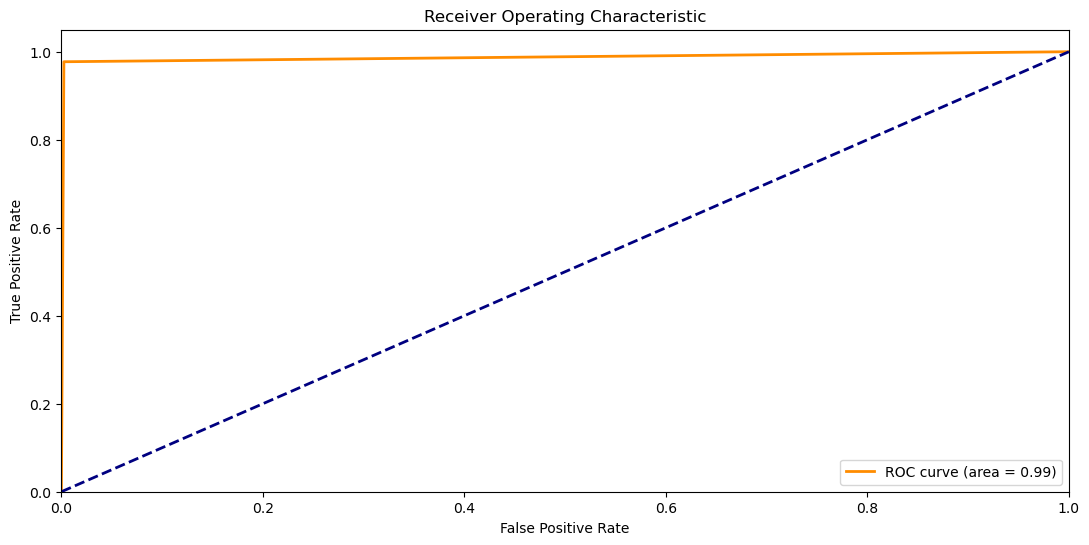

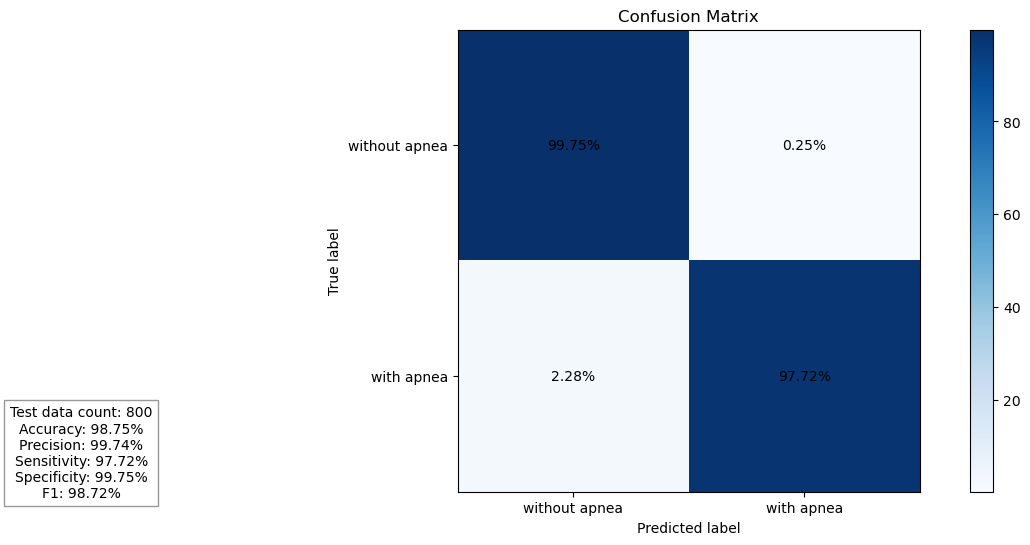

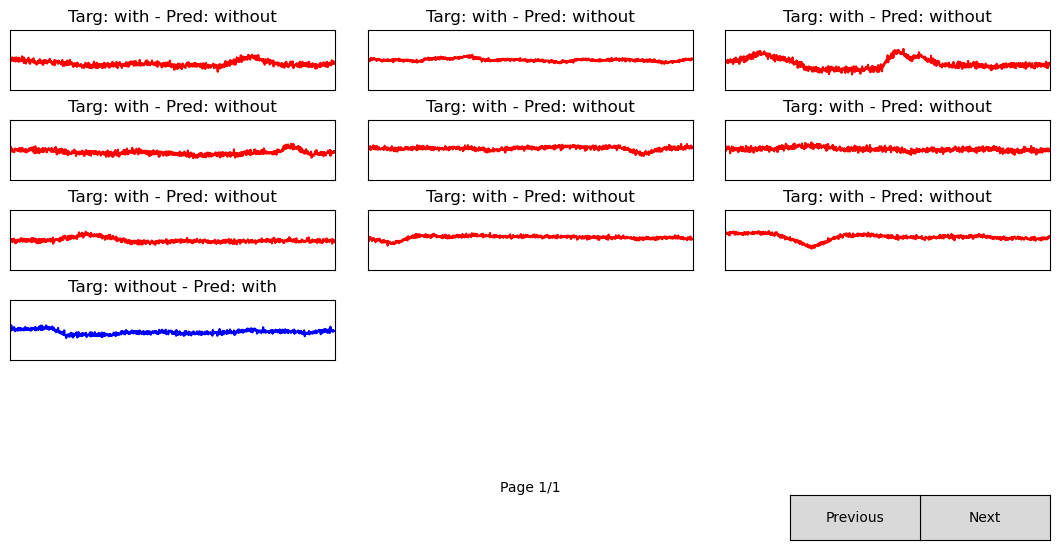

In [9]:
tester = Tester(model = model, 
                testset = dataset.testset, 
                batch_size = 32)
tester.evaluate(plot = True)